In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
from data import parse_and_train_credit_card_dataset
from experiment_utils import get_random_bank_df, run_ranking_experiment, run_reward_experiment, run_budget_change, run_budget_epsilon, run_variance_epsilon, run_bid_experiment

# Setting Up

1. Please configure your python environment with requirements.txt
2. Please download the "default of credit card clients" dataset and put it into the "data" directory. Can be downloaded from OpenML, dataset id: 42477
3. Run this notebook to replicate results

# Train xgb and rf CSS models

In [5]:
credit_df = parse_and_train_credit_card_dataset(seed=100)

training rf
training xgb
rf acc 0.8156666666666667
xgb acc 0.8091666666666667
rf auc 0.6560786240786242
xgb auc 0.6587616707616708
rf ks 0.3131
xgb ks 0.3207


# Budget Ranking and Reward Tests

## Ranking Test
Get the ranking from 100 runs on different RBP strategies

In [6]:
budget_multiple_list = [1/x for x in range(3, 9)][::-1]
run_ranking_experiment(credit_df, budget_multiple_list, use_variance=False, use_confidence=True)

multiple=0.12, shuffle=False, use_variance=False, use_confidence=True
AutoInterest rank:1.0
UCB rank:2.06
E-Greedy rank:2.94
Fixed rank:4.0
********************************************************************************
multiple=0.14, shuffle=False, use_variance=False, use_confidence=True
AutoInterest rank:1.0
UCB rank:2.04
E-Greedy rank:2.97
Fixed rank:3.99
********************************************************************************
multiple=0.17, shuffle=False, use_variance=False, use_confidence=True
AutoInterest rank:1.03
UCB rank:2.01
E-Greedy rank:2.97
Fixed rank:3.99
********************************************************************************
multiple=0.20, shuffle=False, use_variance=False, use_confidence=True
AutoInterest rank:1.27
UCB rank:1.77
E-Greedy rank:2.96
Fixed rank:4.0
********************************************************************************
multiple=0.25, shuffle=False, use_variance=False, use_confidence=True
AutoInterest rank:1.73
UCB rank:1.28
E-Gre

## Reward Test

In [7]:
budget_multiple_list = [1/x for x in range(3, 9)][::-1]

run_reward_experiment(credit_df, budget_multiple_list, use_variance=False, use_confidence=True)

multiple=0.12, shuffle=True, use_variance=False, use_confidence=True
AutoInterest: mean=12589.972671000003	std=3032.759552763178
UCB: mean=10906.670396999958	std=2721.3343395190186
E-Greedy: mean=8063.7832989999915	std=925.5469125329693
Fixed: mean=1493.8265840421216	std=2367.27932503854
********************************************************************************
multiple=0.14, shuffle=True, use_variance=False, use_confidence=True
AutoInterest: mean=14373.414427000005	std=3465.6835402571046
UCB: mean=12479.775656999955	std=3074.7863471977803
E-Greedy: mean=9235.907830999991	std=982.2755154285808
Fixed: mean=1959.77552796861	std=2479.2024640232635
********************************************************************************
multiple=0.17, shuffle=True, use_variance=False, use_confidence=True
AutoInterest: mean=16566.673432000003	std=4153.822959395623
UCB: mean=14602.633041999945	std=3546.532206151345
E-Greedy: mean=10746.944741999985	std=1081.8076400470813
Fixed: mean=1687.037712

# Cumulative Reward

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


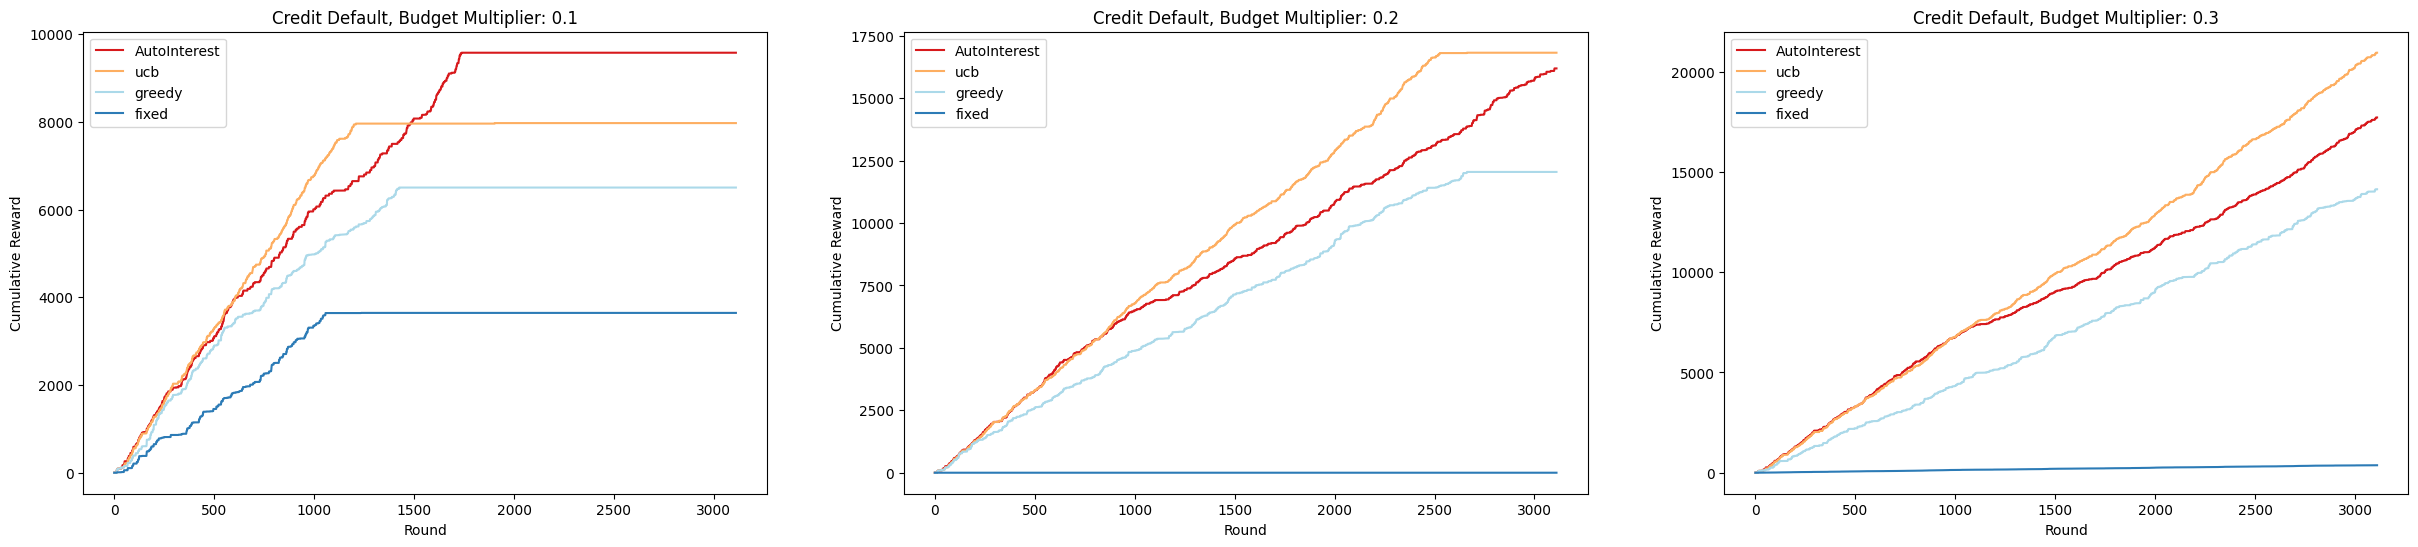

In [8]:
use_variance = False
use_confidence = True
seed = 0
run_budget_change(credit_df, use_variance, use_confidence, seed=seed)

# Visualizing the bids

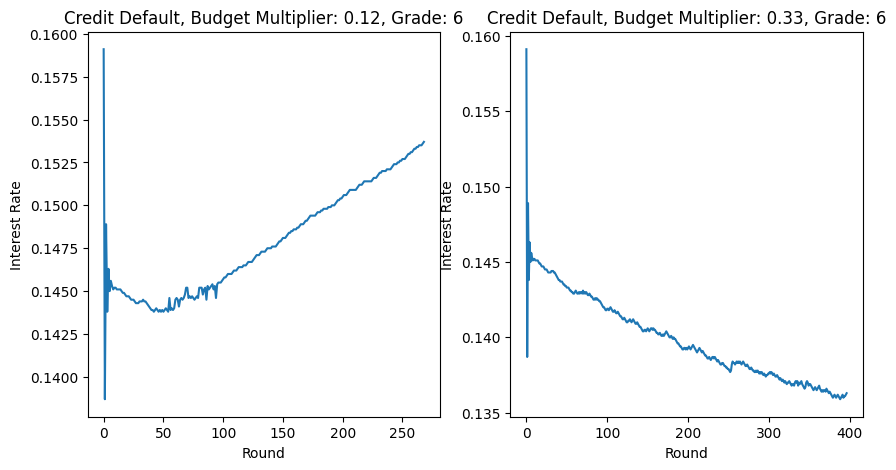

In [9]:
budget_multiple1 = 1 / 8
budget_multiple2 = 1 / 3
seed = 0
run_bid_experiment(credit_df, budget_multiple1, budget_multiple2, seed=seed)

# Budget and Variance Constraint Experiments

## Budget Constraint

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


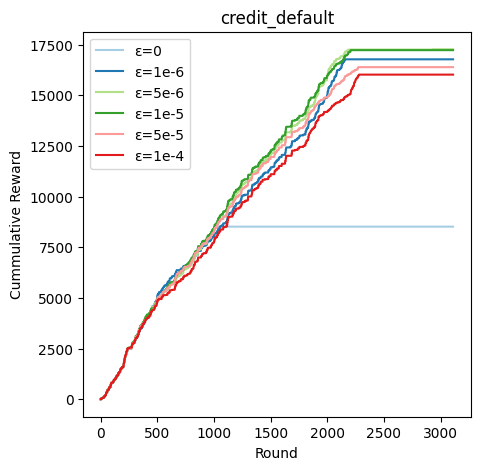

In [10]:
budget_multiple = 1/8
variance_multiple = 1/4
epsilon_list = [0, 1e-6, 5e-6, 1e-5, 5e-5, 1e-4]
epsilon_str_list = ['0', '1e-6', '5e-6', '1e-5', '5e-5', '1e-4']
seed = 0

run_budget_epsilon(credit_df, budget_multiple, variance_multiple, epsilon_list, epsilon_str_list, seed=seed)


## Variance Constraint

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


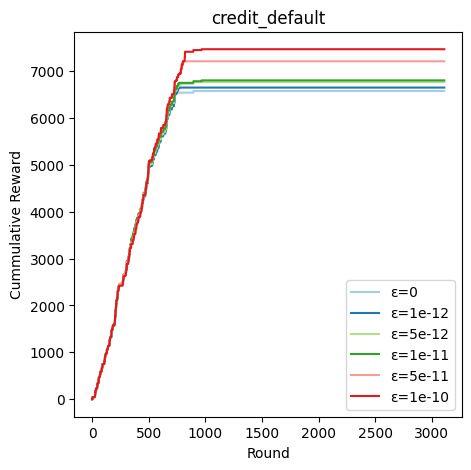

In [11]:
budget_multiple = 1/8
variance_multiple = 1/16
epsilon_list = [0, 1e-12, 5e-12, 1e-11, 5e-11, 1e-10]
epsilon_str_list = ['0', '1e-12', '5e-12', '1e-11', '5e-11', '1e-10']
seed = 42

run_variance_epsilon(credit_df, budget_multiple, variance_multiple, epsilon_list, epsilon_str_list, seed=seed)